In [1]:
from pathlib import Path
import os
import sys
from transformers import AutoProcessor, AutoModelForCausalLM
import torch
from datasets import load_from_disk
sys.path.append(str(Path.cwd().parent))

/home/nico/Thesis/neural-artwork-caption-generator/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.utils.dirutils import get_data_dir, get_models_dir

In [3]:
MODEL_NAME = "microsoft/git-base"
PROCESSOR = AutoProcessor.from_pretrained(MODEL_NAME)
MODEL = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
OUTPUT_DIR = "microsoft_git-base_artgraph"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 1 # choose according to your GPU memory (<= 64) we'll use gradient accumulation

In [4]:
checkpoint = torch.load(get_models_dir() / "captioning" / "microsoft-git-base" / "1.pt")
MODEL.load_state_dict(checkpoint["model_state_dict"])
MODEL.to(DEVICE)

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

In [5]:
dataset = load_from_disk(get_data_dir() / "processed" / "captioning_dataset_augmented_processed")["validation"]

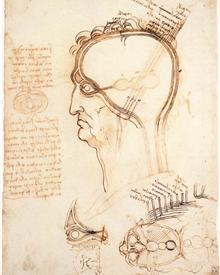

In [6]:
image = dataset[83]["image"]
image

In [7]:
pixel_values = PROCESSOR(images=image, return_tensors="pt").pixel_values.to(DEVICE)
generated_captions = []

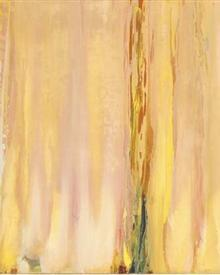

a colorful abstract composition with a brushstrokes and a blue sky


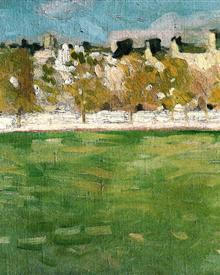

a landscape with trees and a river in the foreground


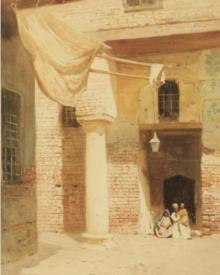

a street scene in rome, with people walking and sitting on the steps


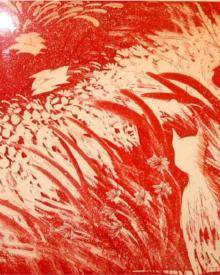

a landscape with a colorful and abstract composition of shapes and lines


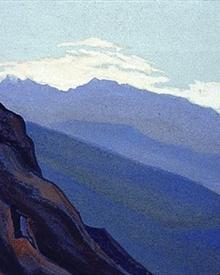

a mountain range with a blue sky and clouds


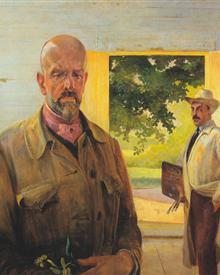

a man with a beard and a hat, standing in front of a window with trees in the background


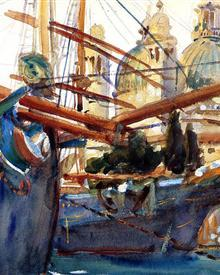

a busy port with boats and people in the background


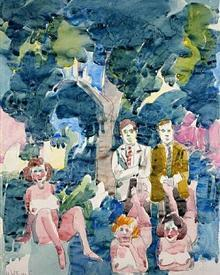

a group of people sitting on a bench, with trees and a cloudy sky in the background


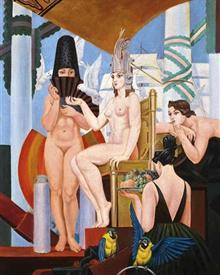

a group of naked women in a room, with a mirror and a man in the background


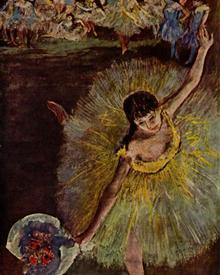

a dancer with a ballerina in a tutu, surrounded by trees and flowers


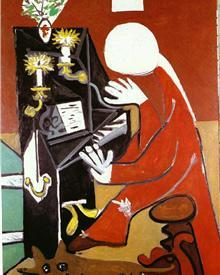

a woman playing a piano, with a red dress and a white shirt, and holding a book


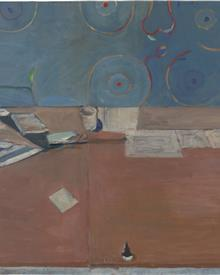

a still life with a table, a vase and a book on a desk


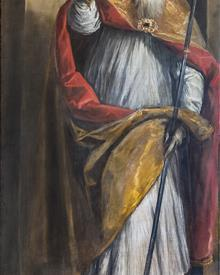

a man with a red robe and a white robe holding a sword


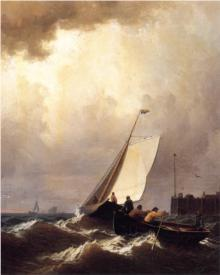

a sailboat on the sea with a cloudy sky in the background


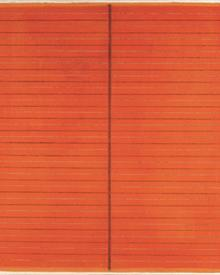

a black and white abstract composition with a red and yellow background


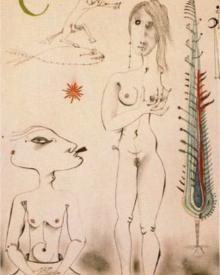

a study of a woman with a white dress and a red hat, with various objects and objects


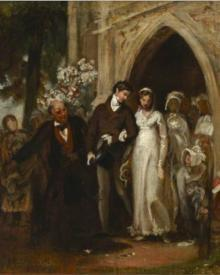

a wedding ceremony in a castle, with people gathered around them


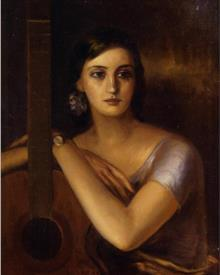

a woman with a white dress and a blue dress, standing in front of a window, holding a guitar in her hand


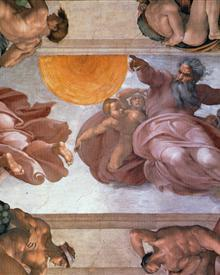

the virgin mary holding a cross, with a man holding the baby jesus


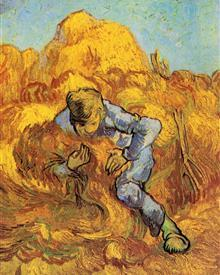

a man with a beard and a hat, standing in a field with trees and hills in the background


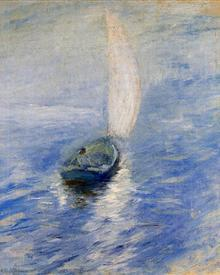

a boat floating on a calm sea with a cloudy sky in the background


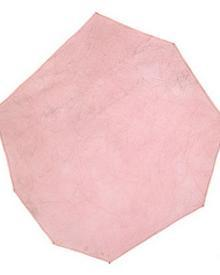

a large red square with a white stripe on the center, surrounded by a blue sky


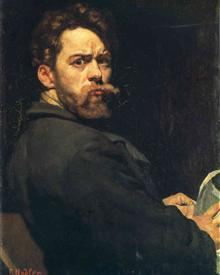

a portrait of a man with a beard and a mustache, wearing a black coat and holding a book


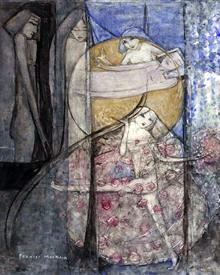

the virgin mary holding the child, with a blue and green background


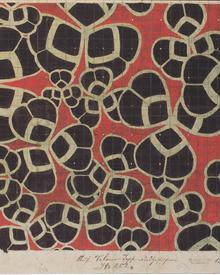

a black and white abstract composition with a red background


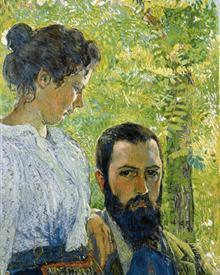

a man and a woman standing in a garden, with a tree in the background


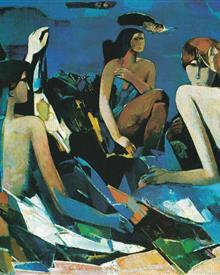

a group of naked women sitting on a beach, with a blue sky in the background


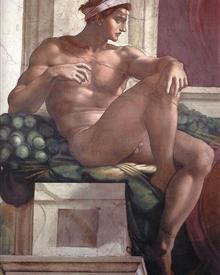

a male nude with a white chest and a red scarf, standing in front of a window with his head resting on his hand


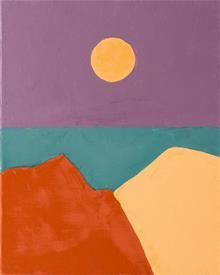

a colorful and abstract composition with a sense of movement and movement


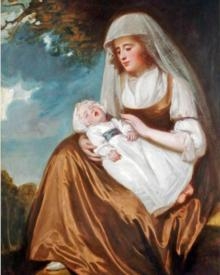

a young woman holding a baby jesus, with a blue sky and a white cloud in the background


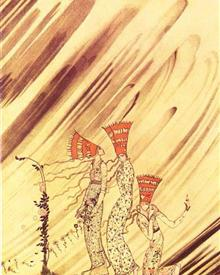

a group of people in traditional costumes, with a sense of movement and energy


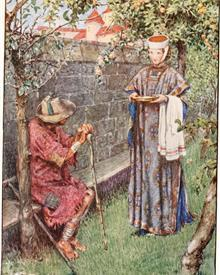

a man and a woman in traditional clothes, standing in front of a stone wall, holding a basket of fruit


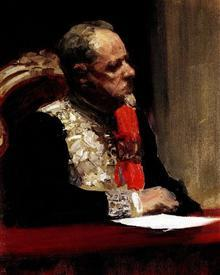

a portrait of a man with a serious expression, wearing a black coat and holding a book


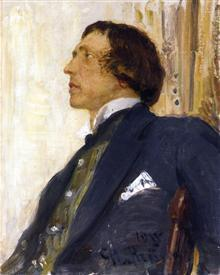

a portrait of a man with a serious expression, wearing a black suit and a white shirt, with his hands resting on his knees


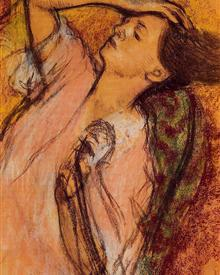

a woman sitting on a chair, holding a fan, with her hands in her pockets


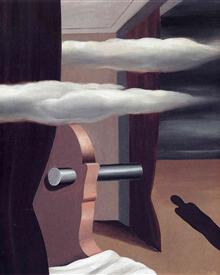

a surreal scene with a man standing in front of a building with trees and a cloudy sky in the background


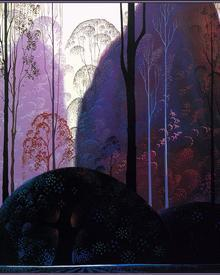

a surreal landscape with a dark and light blue sky and a few clouds


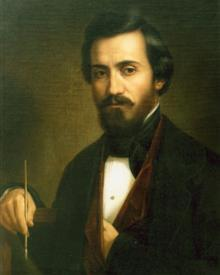

a man with a beard and a mustache, wearing a black coat and holding a book


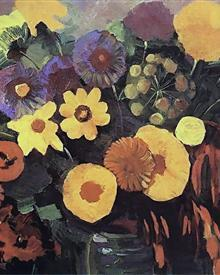

a still life composition of colorful flowers, with a blue sky and clouds in the background


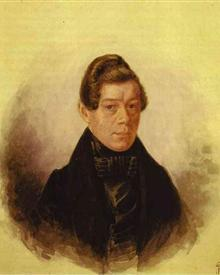

a portrait of a woman with a serious expression, wearing a black coat and a white shirt


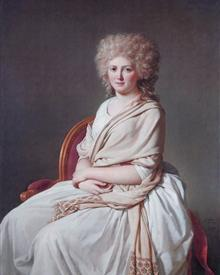

a portrait of a woman with curly hair and a white dress, with a serious expression


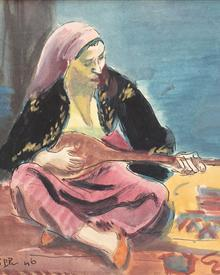

a woman playing a guitar, with a serious expression and a white scarf


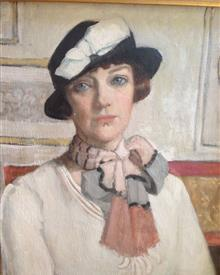

a portrait of a woman with a serious expression, wearing a white dress and a hat


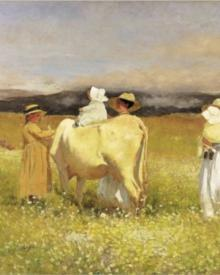

a group of people in a field with a cow and a dog


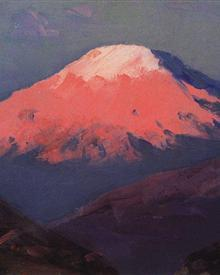

a view of the volcano


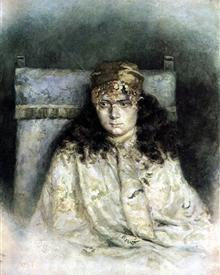

In [8]:
for image in dataset.select((range(100, 150)))["image"]:
    display(image)
    pixel_values = PROCESSOR(images=image, return_tensors="pt").pixel_values.to(DEVICE)
    generated_ids = MODEL.generate(pixel_values=pixel_values, max_length=50, num_beams=1, no_repeat_ngram_size=2)
    generated_caption = PROCESSOR.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_caption)
    generated_captions.append(generated_caption)

In [ ]:
with open("ciao.txt", "w") as f:
    for caption in generated_captions:
        f.write(caption + "\n")